
<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Svetlana's comment  </b>
    

Hi, it's Svetlana.


Thank you for submitting such a great plan! It has everything you need, so you can move on to the code part! :) 

Answers to your questions: 





- > 1. Are there more correlations between monthly charge rates and other categories (gender, how many services they are paying for, etc.)

Didn't understand the question. Try to check correlations between the features. Moreover, sometimes combinations of features are much more important, so correlations may not be that helpful. The relationship may not be linear as well. 


- > 2. Are there other demographic patterns to explore?

Try to explore it and you will get the answer :) This is how EDA works: when we start, we know nothing about the data. We just look for anything at the beginning.


- > 3. What is the real reason senior citizens are leaving more often?

We never know the real reason. Data is all we have. 


- > 4. What is the best strategy to encode the data for Machine Learning efficiency?

This is a question you should first try to answer by yourself. What do you think about it? For instance, if you use tree-based models, should you use one-hot methods that create a lot of extra rows? There's no best strategy. It all depends on data. 

</div>

# Final Project: Work Plan

## Introduction

The telecom operator Interconnect has contracted me to create a machine learning model to predict customer churn. In this notebook, I will explore the data and devise a plan to create and test the model for preapproval from the company.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load Datasets
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Loading Info

In [3]:
print(contract.info())
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
print(personal.info())
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
print(phone.info())
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [14]:
# Merging DataFrames together
df = pd.merge(contract, personal, on='customerID', how='left')
df = pd.merge(df, internet, on='customerID', how='left')  
df = pd.merge(df, phone, on='customerID', how='left')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Handling Missing Values

In [16]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64


In [17]:
# Fill internet service columns
internet_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internet_columns:
    df[col] = df[col].fillna('No internet service')

# Fill phone service column
df['MultipleLines'] = df['MultipleLines'].fillna('No phone service')

# Verify the changes
print("\nAfter filling missing values:")
print(df.isnull().sum())


After filling missing values:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64


### Feature Engineering

In [22]:
# Converting Total Charges to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
print(df['TotalCharges'].dtype)
print(df['TotalCharges'].isna().sum())

float64
11


In [23]:
# Create churn target variable
df['Churn'] = df['EndDate'] != 'No'
print("Churn distribution:")
print(df['Churn'].value_counts())

Churn distribution:
False    5174
True     1869
Name: Churn, dtype: int64


In [24]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
print(df['BeginDate'].dtype)

datetime64[ns]


### Visualizations

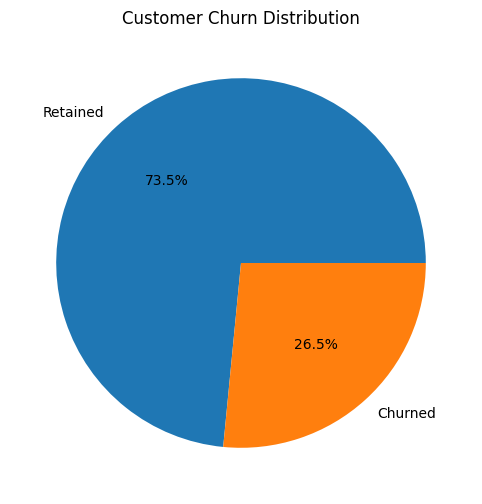

Churn rate: 26.5%


In [27]:
# Churn distribution with percentages
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%')
plt.title('Customer Churn Distribution')
plt.show()

print(f"Churn rate: {df['Churn'].mean():.1%}")

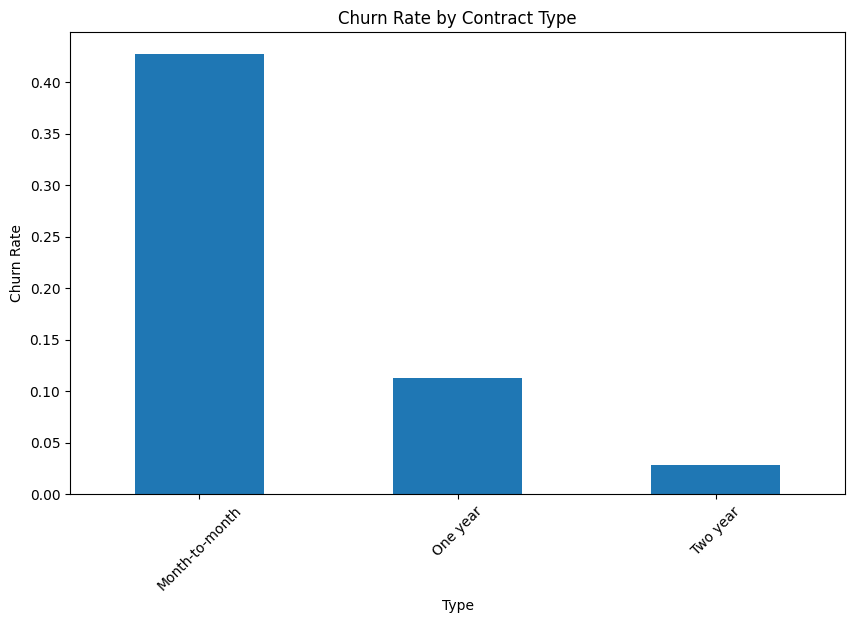

In [28]:
# This will show if contract length affects churn
plt.figure(figsize=(10, 6))
churn_by_contract = df.groupby('Type')['Churn'].agg(['count', 'sum', 'mean'])
churn_by_contract['churn_rate'] = churn_by_contract['mean']

churn_by_contract['churn_rate'].plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

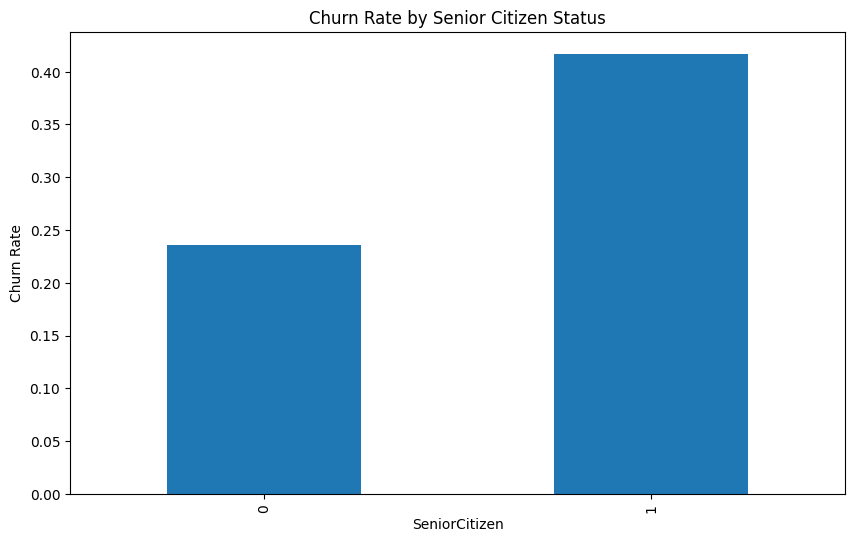

In [33]:
plt.figure(figsize=(10, 6))
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].agg(['count', 'sum', 'mean'])
churn_by_senior['churn_rate'] = churn_by_senior['mean']

churn_by_senior['churn_rate'].plot(kind='bar')
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Churn Rate')
plt.show()

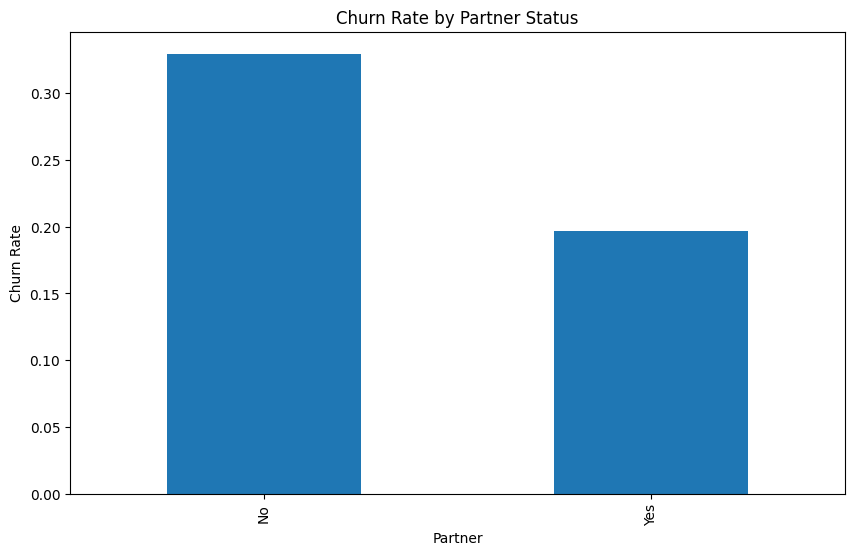

In [35]:
plt.figure(figsize=(10, 6))
churn_by_partner = df.groupby('Partner')['Churn'].agg(['count', 'sum', 'mean'])
churn_by_partner['churn_rate'] = churn_by_partner['mean']

churn_by_partner['churn_rate'].plot(kind='bar')
plt.title('Churn Rate by Partner Status')
plt.ylabel('Churn Rate')
plt.show()

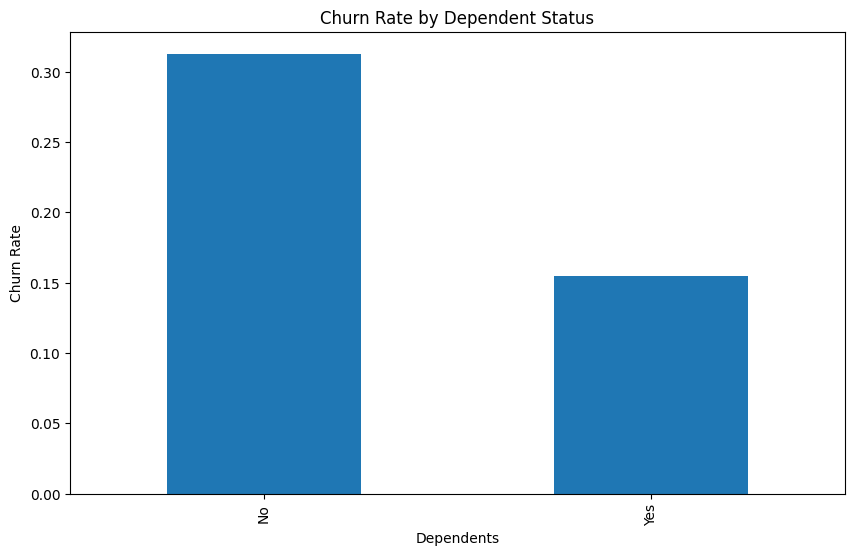

In [34]:
plt.figure(figsize=(10, 6))
churn_by_dependent = df.groupby('Dependents')['Churn'].agg(['count', 'sum', 'mean'])
churn_by_dependent['churn_rate'] = churn_by_dependent['mean']

churn_by_dependent['churn_rate'].plot(kind='bar')
plt.title('Churn Rate by Dependent Status')
plt.ylabel('Churn Rate')
plt.show()

Text(0.5, 0, 'Monthly Charges')

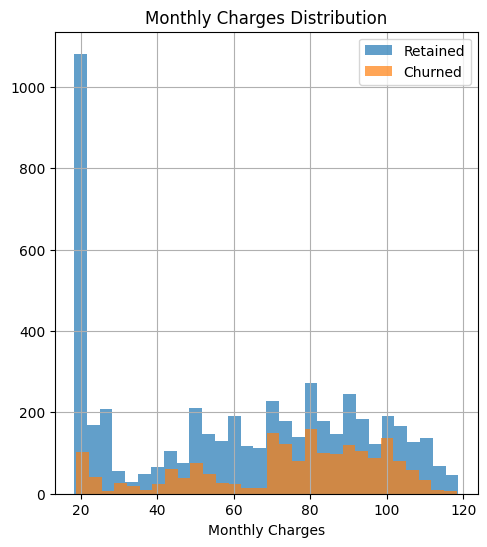

In [29]:
# Compare charges between churned and retained customers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[df['Churn'] == False]['MonthlyCharges'].hist(alpha=0.7, label='Retained', bins=30)
df[df['Churn'] == True]['MonthlyCharges'].hist(alpha=0.7, label='Churned', bins=30)
plt.legend()
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')

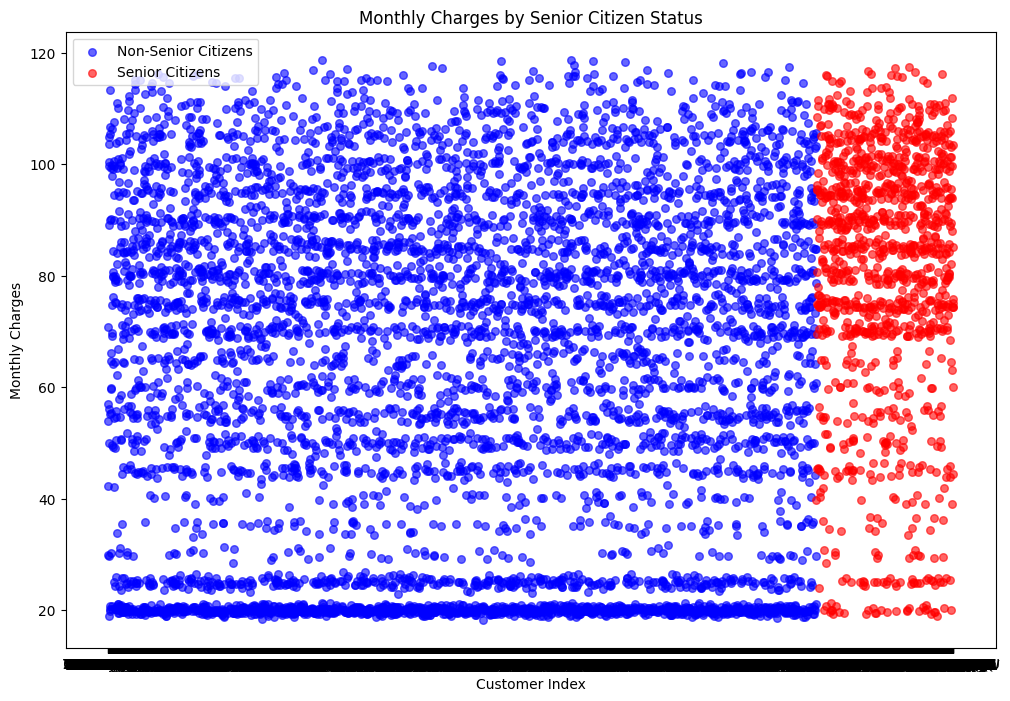

In [38]:
plt.figure(figsize=(12, 8))

senior_yes = df[df['SeniorCitizen'] == 1]
senior_no = df[df['SeniorCitizen'] == 0]

plt.scatter(senior_no.index, senior_no['MonthlyCharges'], 
           alpha=0.6, label='Non-Senior Citizens', color='blue', s=30)
plt.scatter(senior_yes.index, senior_yes['MonthlyCharges'], 
           alpha=0.6, label='Senior Citizens', color='red', s=30)

plt.xlabel('Customer Index')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Senior Citizen Status')
plt.legend()
plt.show()

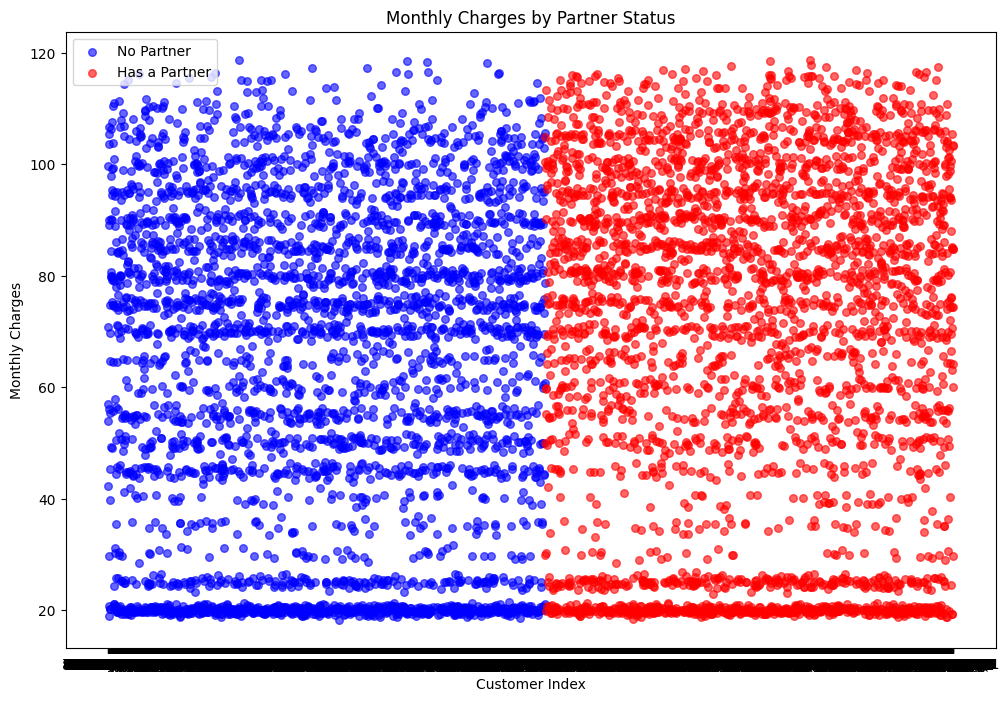

In [39]:
plt.figure(figsize=(12, 8))

partner_yes = df[df['Partner'] == 'Yes']
partner_no = df[df['Partner'] == 'No']

plt.scatter(partner_no.index, partner_no['MonthlyCharges'], 
           alpha=0.6, label='No Partner', color='blue', s=30)
plt.scatter(partner_yes.index, partner_yes['MonthlyCharges'], 
           alpha=0.6, label='Has a Partner', color='red', s=30)

plt.xlabel('Customer Index')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Partner Status')
plt.legend()
plt.show()

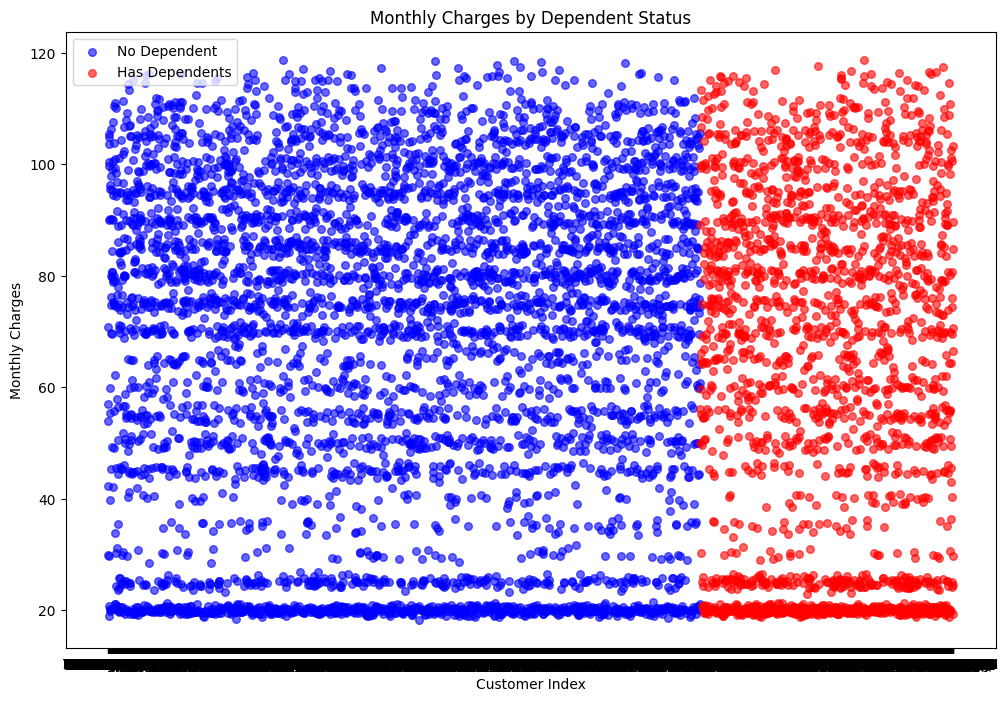

In [42]:
plt.figure(figsize=(12, 8))

dependent_yes = df[df['Dependents'] == 'Yes']
dependent_no = df[df['Dependents'] == 'No']

plt.scatter(dependent_no.index, dependent_no['MonthlyCharges'], 
           alpha=0.6, label='No Dependent', color='blue', s=30)
plt.scatter(dependent_yes.index, dependent_yes['MonthlyCharges'], 
           alpha=0.6, label='Has Dependents', color='red', s=30)

plt.xlabel('Customer Index')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Dependent Status')
plt.legend()
plt.show()

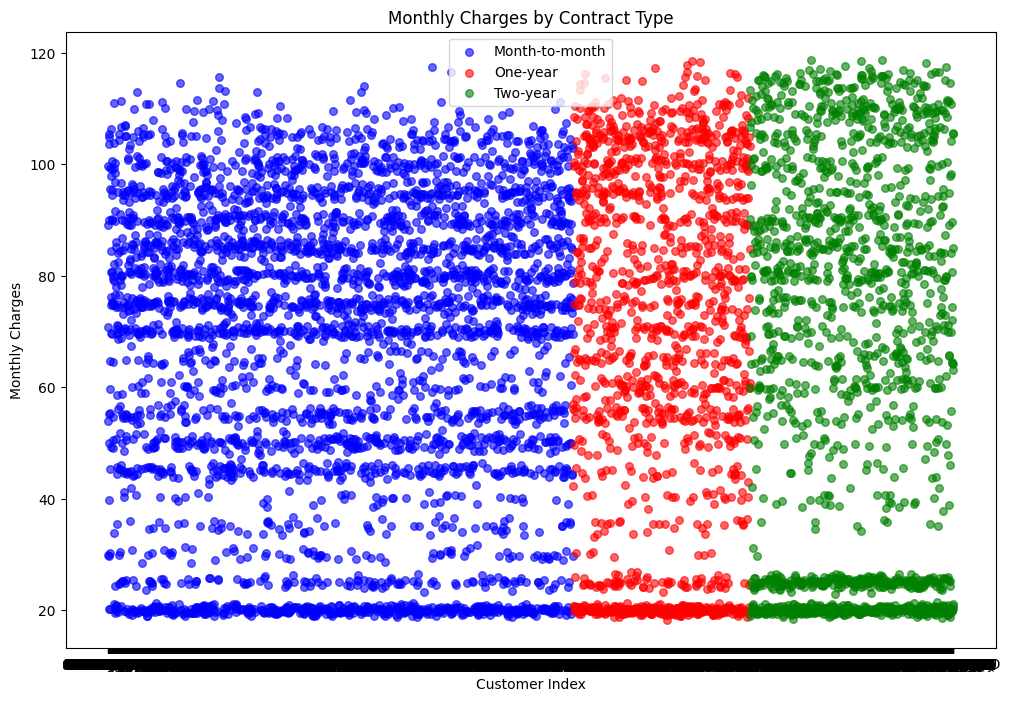

In [43]:
plt.figure(figsize=(12, 8))

contract_month = df[df['Type'] == 'Month-to-month']
contract_yearly = df[df['Type'] == 'One year']
contract_2_yearly = df[df['Type'] == 'Two year']

plt.scatter(contract_month.index, contract_month['MonthlyCharges'], 
           alpha=0.6, label='Month-to-month', color='blue', s=30)
plt.scatter(contract_yearly.index, contract_yearly['MonthlyCharges'], 
           alpha=0.6, label='One-year', color='red', s=30)
plt.scatter(contract_2_yearly.index, contract_2_yearly['MonthlyCharges'], 
           alpha=0.6, label='Two-year', color='green', s=30)

plt.xlabel('Customer Index')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Contract Type')
plt.legend()
plt.show()

#### Conclusions based on visualizations

- Customers that are responsible for other people (partners / dependents) are less likely to leave and find different providers.
- Senior Citizens are more likely to leave than non-senior citizens. This could be because their children make decisions for them, fixed income restraints, might have other service needs that don't comply with what Interconnect has to offer, etc.
- Month-to-month customers have a much higher churn rate than those with 1 or 2 year plans. This is expected considering that some might forget to pay the next month, enjoy the flexibility of seeing other options, can only afford one month on and off based on income restraints, etc.
- Customers with higher monthly charge rates are more likely to leave. Reasons include that they go and look for cheaper options or better deals. This can be reflected in the "Monthly Charges by Contract Type" plot where you can see a higher concentration of high paying customers in the Month-to-Month plan.

# Clarifying Questions to explore further

1. Are there more correlations between monthly charge rates and other categories (gender, how many services they are paying for, etc.)
2. Are there other demographic patterns to explore?
3. What is the real reason senior citizens are leaving more often?
4. What is the best strategy to encode the data for Machine Learning efficiency?

# Rough Plan moving forward

1. Encode the categorical data to be consistent across the entire set
2. Balance the classes using SMOTE
3. Split the data into training, validation, and test sets
4. Train multiple models with gradient boosting capabilities
    - HistGradientBoosting
    - CatBoost
    - XGBoost
    - Sci-Kit Learn GradientBoostingClassifier
5. Compare model scores and determine which is best based on evaluation metrics and efficiency